In [112]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from scipy import misc

## Ajuste lineal de brillo y contraste


Texto **negrita**

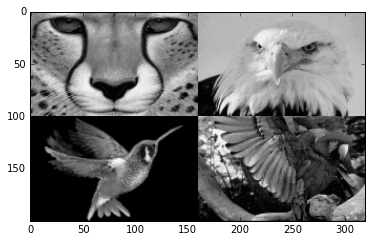

In [113]:
from PIL import Image
img= Image.open(r'animal.tfe.bmp')
#plt.imshow(img,cmap='gray',vmin=0,vmax=255)
plt.imshow(img)

Convertimos la imagen a array


In [114]:
img2= misc.imread('animal.tfe.bmp')
#misc.imsave('img.bmp', img)
type(img2)
img2.shape

(200, 320, 3)

Calculo el histograma

In [115]:
histograma=np.zeros(256, dtype=np.int)

for i in range(0,319):
    for j in range(0,199):
        k=img2[j,i,0] 
        histograma[k]=histograma[k]+1

histograma
#plt.hist(histograma)

array([10468,     0,     0,  2018,     0,     0,   896,     0,     0,
           0,     0,   460,     0,     0,   764,     0,     0,     0,
           0,   455,     0,     0,     0,   862,     0,     0,     0,
         415,     0,     0,   821,     0,     0,     0,   491,     0,
           0,     0,     0,   686,     0,     0,   370,     0,     0,
           0,     0,   889,     0,     0,   500,     0,     0,     0,
           0,   598,     0,     0,     0,   673,     0,     0,     0,
         590,     0,     0,     0,   553,     0,     0,   598,     0,
           0,     0,   918,     0,     0,     0,     0,   555,     0,
           0,     0,   601,     0,     0,   646,     0,     0,     0,
           0,   851,     0,     0,   851,     0,     0,     0,     0,
           0,   879,     0,     0,   804,     0,     0,  1022,     0,
           0,     0,     0,  1175,     0,     0,  1133,     0,     0,
           0,     0,  1113,     0,     0,     0,  1526,     0,     0,
           0,  1109,

Calcular la media y la desviación típica a través del histograma

media = 1/size-imagen sum h(k)*k

In [116]:
suma = 0
for i in range (0,255):
    suma = suma + i * histograma[i]
media = suma / (320 *200)

print ("Brillo de la imagen = ", media)

Brillo de la imagen =  101.84396875


Desviación típica


In [117]:
suma2 = 0

for i in range (0,255):
    suma2 = suma2 + ( histograma[i] * (i - media)**2 ) 
   
desviacion = np.sqrt(suma2/(320*200) )
print ("Contraste =", desviacion)


Contraste = 73.0556604157


Valores de brillo y contraste nuevo

In [118]:
nuevaMedia =150
nuevaDesviacion =73


In [119]:
a = nuevaDesviacion / desviacion
b = nuevaMedia - ( a * media)

print (a, b)

0.999238109472 48.2336252051


In [120]:
tablaTransformacion = np.zeros(256 , dtype=np.float64)

for i in range (0,255):
    valor = int( a*i+b)
    if valor > 255:
        valor = 255
    elif valor < 0:
        valor = 0
    
    tablaTransformacion[i]= valor
    


In [121]:
img3 = img2

for i in range(0,319):
    for j in range(0,199):
        vin=img2[j,i,0] 
        vout=tablaTransformacion[vin] 
        img3[j,i,:]=vout
        

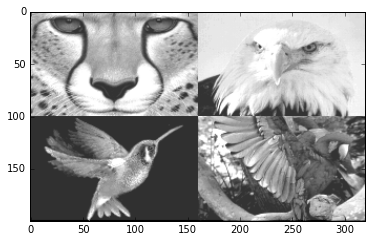

In [122]:
plt.imshow(img3)